## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


## Task 4.9 Code Along

In [2]:
ords_prods_merge = pd.read_pickle(r"C:\Users\Windows\Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_merge2.pkl")

In [3]:
ords_prods_merge.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,...,reordered,busiest_days,busiest_period_of_day,price_range_loc,max_order,loyalty_flag,avg_spending,spender_flag,last_order,ord_freq_flag
0,1,Chocolate Sandwich Cookies,19,19,5.8,3139998,138,28,6,11,...,0,Regularly busy,Most orders,Mid-range product,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,19,19,5.8,1977647,138,30,6,17,...,1,Regularly busy,Most orders,Mid-range product,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,19,19,5.8,389851,709,2,0,21,...,0,Busiest day,Average orders,Mid-range product,5,New customer,7.930208,Low spender,7.0,Frequent customer
3,1,Chocolate Sandwich Cookies,19,19,5.8,652770,764,1,3,13,...,0,Slowest day,Most orders,Mid-range product,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,19,19,5.8,1813452,764,3,4,17,...,1,Slowest day,Most orders,Mid-range product,3,New customer,4.972414,Low spender,9.0,Frequent customer


<Axes: >

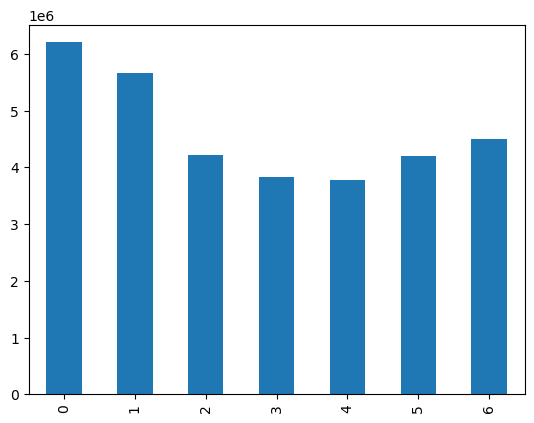

In [4]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

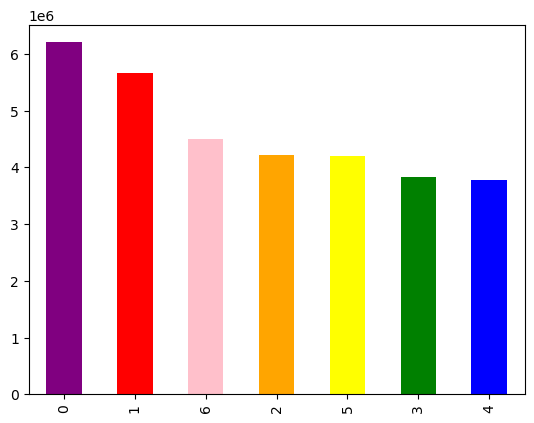

In [5]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [6]:
path = r"C:\Users\Windows\Instacart Basket Analysis"

In [7]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [8]:
# Data cleaning to NA values to remove values above 100. 

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [9]:
ords_prods_merge['prices'].max()

25.0

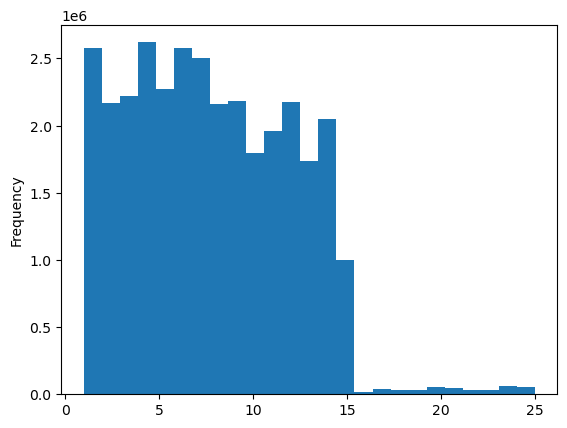

In [10]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

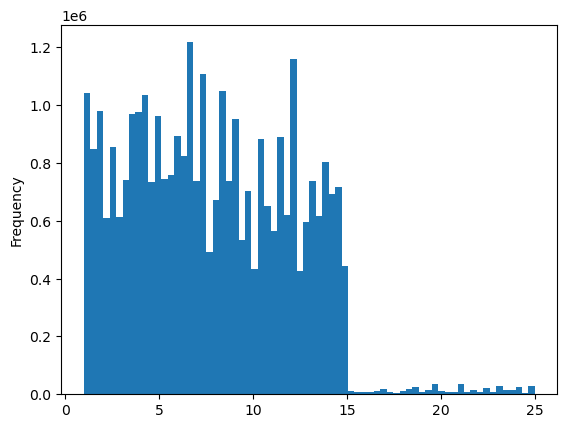

In [11]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [12]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [13]:
# create a list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [14]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [15]:
# store 70% of the sample in the dataframe  big

big = ords_prods_merge[dev]


In [16]:
# store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [17]:
len(ords_prods_merge)

32404859

In [18]:
len(big) + len (small)

32404859

In [19]:
df_2 = small[['orders_day_of_week','prices']]

In [20]:
df_2.head()

,orders_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8


In [21]:
small.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,...,reordered,busiest_days,busiest_period_of_day,price_range_loc,max_order,loyalty_flag,avg_spending,spender_flag,last_order,ord_freq_flag
0,1,Chocolate Sandwich Cookies,19,19,5.8,3139998,138,28,6,11,...,0,Regularly busy,Most orders,Mid-range product,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,19,19,5.8,389851,709,2,0,21,...,0,Busiest day,Average orders,Mid-range product,5,New customer,7.930208,Low spender,7.0,Frequent customer
3,1,Chocolate Sandwich Cookies,19,19,5.8,652770,764,1,3,13,...,0,Slowest day,Most orders,Mid-range product,3,New customer,4.972414,Low spender,9.0,Frequent customer
6,1,Chocolate Sandwich Cookies,19,19,5.8,1871483,825,3,2,14,...,0,Regularly busy,Most orders,Mid-range product,9,New customer,5.957576,Low spender,19.0,regular customer
10,1,Chocolate Sandwich Cookies,19,19,5.8,1798115,1379,1,5,11,...,0,Regularly busy,Most orders,Mid-range product,10,New customer,5.813636,Low spender,20.0,regular customer


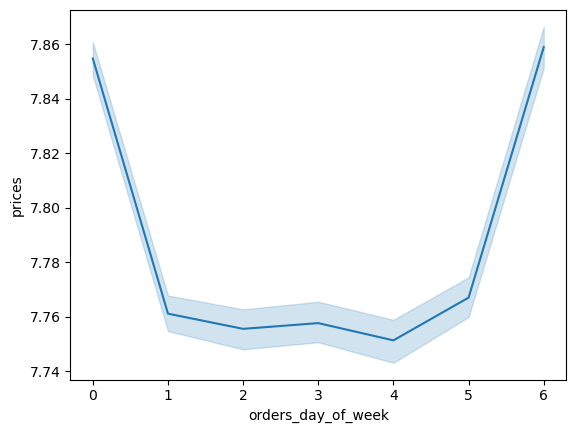

In [23]:
# line = sns.lineplot(x ='orders_day_of_week', y ='prices', data = df_2)